# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data & Cleaning

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Unnamed: 0,AT,V,AP,RH,PE
0,0,14.96,41.76,1024.07,73.17,463.27
1,1,25.18,62.96,1020.04,59.08,444.37
2,2,5.11,39.40,1012.16,92.14,488.56
3,3,20.86,57.32,1010.24,76.64,446.48
4,4,10.82,37.50,1009.23,96.62,473.90


### AT: Ambient Temperature, V: Vaccum, AP: Ambient Pressure, RH: Relative Humidity, PE: Power (Target)

In [4]:
df.columns

Index(['Unnamed: 0', 'AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [6]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7500 non-null   float64
 1   V       7500 non-null   float64
 2   AP      7500 non-null   float64
 3   RH      7500 non-null   float64
 4   PE      7500 non-null   float64
dtypes: float64(5)
memory usage: 293.1 KB


In [8]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [9]:
df.shape

(7500, 5)

## Correlation Analysis
###### 0.52 (AP) & 0.38 (RH) suggests a good predictive power 
###### 0.84 (AT-V) will lead to multicollinearity since we will try removing one variable out of them

<Axes: >

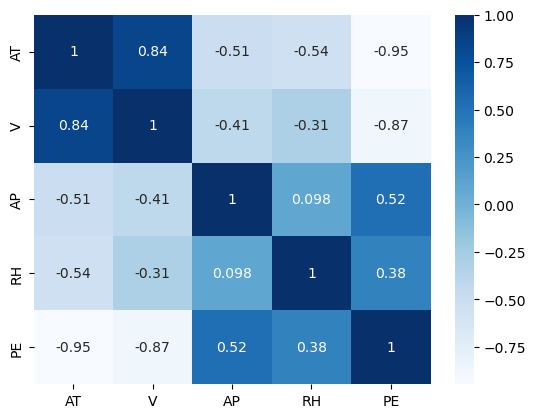

In [11]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

## Data Viz

#### Checking for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1b3a36cae10>,
 'caps': [<matplotlib.lines.Line2D at 0x1b3a36c85d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b3a3bfd0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b3a36367d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b3a3637e10>],
 'means': []}

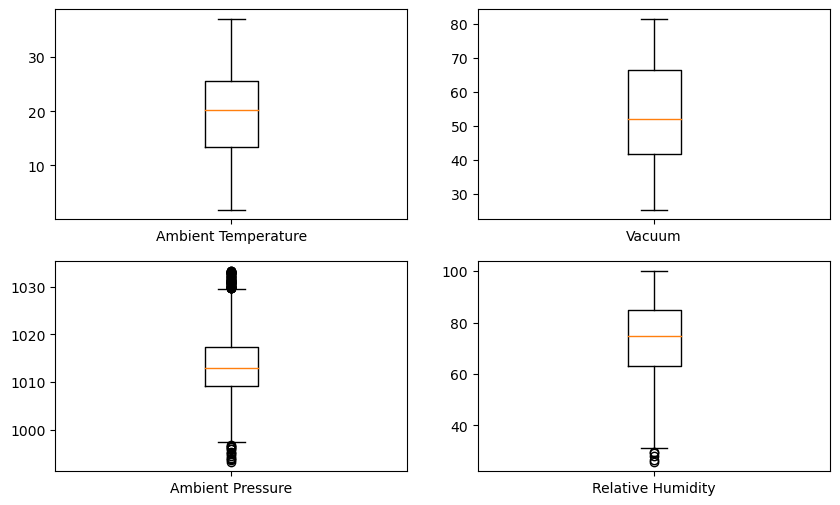

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axes[0, 0].boxplot(x=df['AT'],labels=["Ambient Temperature"])
axes[0, 1].boxplot(x=df['V'],labels=["Vacuum"])
axes[1, 0].boxplot(x=df['AP'],labels=["Ambient Pressure"])
axes[1, 1].boxplot(x=df['RH'],labels=["Relative Humidity"])


### Since  Outlier number is less we can remove them without much loss of data

In [55]:
col='RH'
outliers_rh=[]
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
for i in df[col]:
    if i<lower_bound or i >upper_bound:
        outliers_rh.append(i)
col='AP'
outliers_ap=[]
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
for i in df[col]:
    if i<lower_bound or i >upper_bound:
        outliers_ap.append(i)
print('Outliers in AP column are',len(outliers_ap))
print('Outliers RH column are',len(outliers_rh))

Outliers in AP column are 71
Outliers RH column are 5


### Removing Outliers

In [60]:
import numpy as np

def remove_outliers(df, iqr_multiplier=1.5):
    df_outliers= df.copy()
    for col in df_outliers.columns:
        if not np.issubdtype(df_outliers[col].dtype, np.number):
            continue

        Q1 = df_outliers[col].quantile(0.25)
        Q3 = df_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (iqr_multiplier * IQR)
        upper_bound = Q3 + (iqr_multiplier * IQR)
    # Filter rows excluding outliers
        df_outliers = df_outliers.loc[(df_outliers[col] >= lower_bound) & (df_outliers[col] <= upper_bound)]
    return df_outliers

df_filtered = remove_outliers(df.copy())

#### Data Distribution

(array([  4.,  14.,  40.,  85., 144., 190., 205., 325., 386., 442., 546.,
        588., 630., 696., 687., 744., 715., 523., 314., 222.]),
 array([ 25.89  ,  29.6035,  33.317 ,  37.0305,  40.744 ,  44.4575,
         48.171 ,  51.8845,  55.598 ,  59.3115,  63.025 ,  66.7385,
         70.452 ,  74.1655,  77.879 ,  81.5925,  85.306 ,  89.0195,
         92.733 ,  96.4465, 100.16  ]),
 <BarContainer object of 20 artists>)

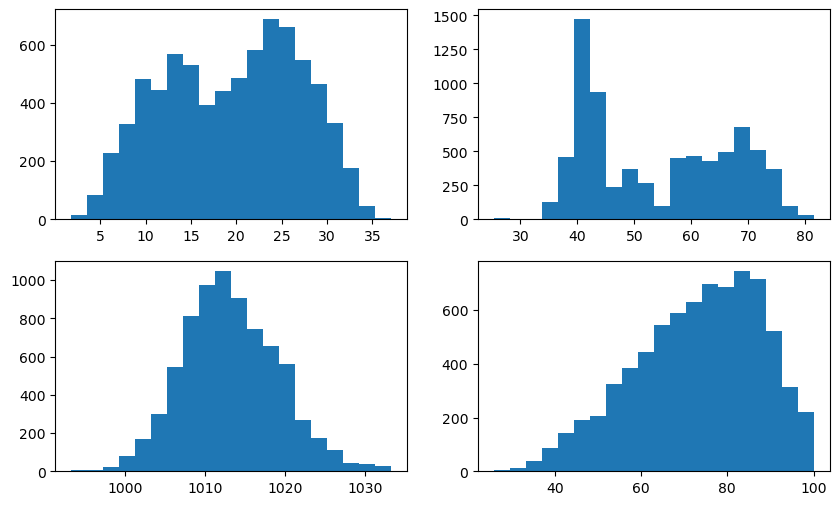

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axes[0, 0].hist(x=df['AT'],bins=20)
axes[0, 1].hist(x=df['V'],bins=20)
axes[1, 0].hist(x=df['AP'],bins=20)
axes[1, 1].hist(x=df['RH'],bins=20)

##### Data Ranges
###### Only Ambient Pressure is close to normal distribution
###### Our data will need scaling as well

Text(0.5, 0, 'Values')

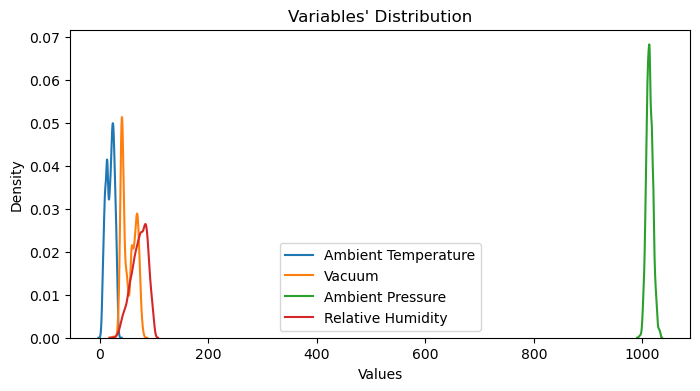

In [39]:
plt.figure(figsize=(8,4))
sns.kdeplot(x=df['AT'],label='Ambient Temperature')
sns.kdeplot(x=df['V'],label='Vacuum')
sns.kdeplot(x=df['AP'],label='Ambient Pressure')
sns.kdeplot(x=df['RH'],label='Relative Humidity')
plt.legend()
plt.title("Variables' Distribution")
plt.xlabel('Values')

## Modelling

### Finding out Feature importance using Random Forest Feature Importance

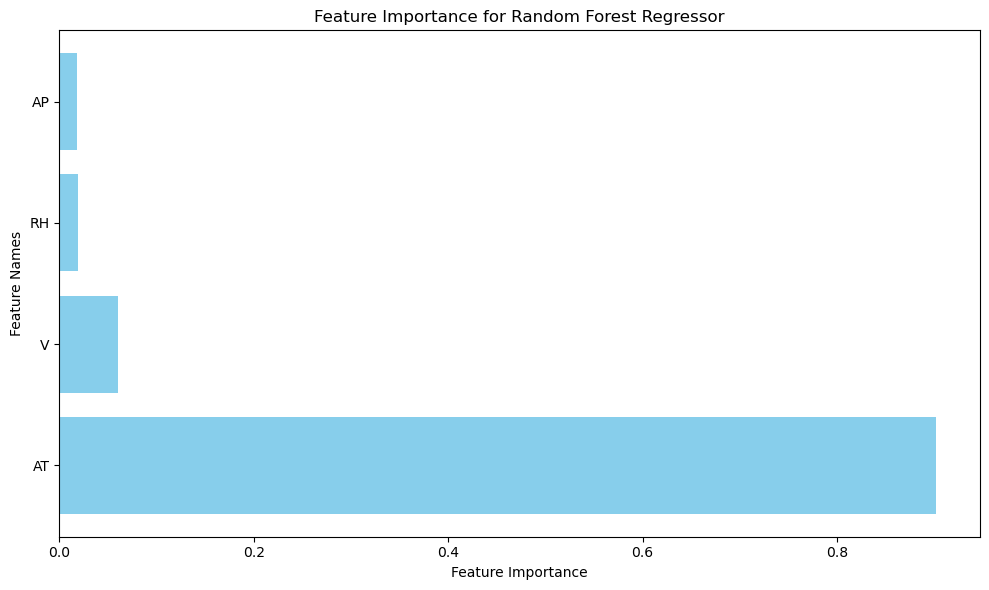

0.9639327205778324
10.665815467488205


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
data = df_filtered
X = data.drop("PE", axis=1) 
y = data["PE"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
feature_names = X.columns

feature_importance_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_sorted)), [f[1] for f in feature_importance_sorted], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance for Random Forest Regressor')
plt.yticks([i for i in range(len(feature_importance_sorted))], [f[0] for f in feature_importance_sorted])
plt.tight_layout()
plt.show()

y_pred = model.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

In [64]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb

data = df_filtered
X = data.drop("PE", axis=1)
y = data["PE"] 

n_splits = 10  
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

models = {
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
}
scalers = {model_name: StandardScaler() for model_name in models.keys()}

for model_name, model in models.items():
    scaler = scalers[model_name]
    r2_scores = []
    mse_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)

        r2_scores.append(r2_score(y_test, y_pred))
        mse_scores.append(mean_squared_error(y_test, y_pred))

    print(f"\nModel: {model_name}")
    print(f"Average R-squared: {sum(r2_scores) / len(r2_scores):.4f}")
    print(f"Average MSE: {sum(mse_scores) / len(mse_scores):.4f}")



Model: XGBoost
Average R-squared: 0.9656
Average MSE: 9.9778
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 6681, number of used features: 4
[LightGBM] [Info] Start training from score 454.416426
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 6681, number of used features: 4
[LightGBM] [Info] Start training from score 454.126601
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 

# Best Model to Go furthur
##### Model: XGBoost ✅
- Average R-squared: 0.9656
- Average MSE: 9.9778

##### Model: LightGBM
- Average R-squared: 0.9605
- Average MSE: 11.4654

###### Model: Random Forest
- Average R-squared: 0.9606
- Average MSE: 11.4183

###### Model: Decision Tree
- Average R-squared: 0.9261
- Average MSE: 21.4535

In [69]:
from sklearn.model_selection import RandomizedSearchCV

data = df_filtered
X = data.drop("PE", axis=1)
y = data["PE"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'learning_rate': [0.01, 0.1, 1],  
    'n_estimators': [100, 500, 1000],  
    'max_depth': [3, 5, 8],  
    'min_child_weight': [1, 3, 5],  
    'gamma': [0, 0.1, 0.5],  
    'colsample_bytree': [0.5, 0.7, 1], 
}

xgb_model = XGBRegressor(objective='reg:squarederror')
rand_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)

rand_search.fit(X_train, y_train)

best_model = rand_search.best_estimator_

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Best Hyperparameters: {rand_search.best_params_}")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")


Best Hyperparameters: {'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1}
R-squared: 0.9667
MSE: 9.8433


## Final MSE & R2 Score
- Model: XGBoost 🏆
- Best Hyperparameters: {'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1}
- R-squared: 0.9667
- MSE: 9.8433